In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\91721\\Downloads\\googleplaystore.csv')

ad=pd.read_csv('C:\\Users\\91721\\Downloads\\googleplaystore.csv')

In [3]:
df2= pd.read_csv('C:\\Users\\91721\\Downloads\\googleplaystore_user_reviews.csv')      # loading user review data

df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [10]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [11]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [12]:
df2.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


## Cleaning the dataset





In [13]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [14]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

errors=’coerce’. It will replace all non-numeric values with NaN.

**Fix the Size**

In [15]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
def fix_size(s):
  try:
    if s.endswith('M'):
      return float(s[:-1])
    elif s.endswith('k'):
      return (float(s[:-1]) / 1024)
    elif s == '1,000+':
      return 1.0
    else:
      return np.nan
  except:
      return np.nan

**Demo**

In [17]:
fix_size('98M')

98.0

1 mb =1024kb

In [18]:
fix_size('45k')

0.0439453125

In [19]:
fix_size('demo')

nan

**fix the  all elements in Size columns**

In [20]:
df['Size']= df['Size'].apply(fix_size)

In [21]:
df['Size'].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 2.70000000e+00, 5.50000000e+00,
       1.70000000e+01, 3.90000000e+01, 3.10000000e+01, 4.20000000e+00,
       7.00000000e+00, 2.30000000e+01, 6.00000000e+00, 6.10000000e+00,
       4.60000000e+00, 9.20000000e+00, 5.20000000e+00, 1.10000000e+01,
       2.40000000e+01,            nan, 9.40000000e+00, 1.50000000e+01,
       1.00000000e+01, 1.20000000e+00, 2.60000000e+01, 8.00000000e+00,
       7.90000000e+00, 5.60000000e+01, 5.70000000e+01, 3.50000000e+01,
       5.40000000e+01, 1.96289062e-01, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [23]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [24]:
def fix_Price(A):
  try:
    if A.startswith('$'):
      return float(A[1:])
    else:
      return 0.0
  except:
    return np.nan

In [25]:
df['Price']=ad['Price']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [27]:
fix_Price('Everyone')

0.0

In [28]:
df['Price']=df['Price'].apply(fix_Price)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [30]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [31]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [32]:
fx = df[df['Rating']>5].index
fx


Index([10472], dtype='int64')

In [33]:
df.drop(fx,axis =0,inplace =True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [35]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [36]:
def lower_category(B):
  return B.title()

In [37]:
lower_category('AUTO_AND_VEHICLES')


'Auto_And_Vehicles'

In [38]:
df['Category'] =df['Category'].apply(lower_category)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [40]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [41]:
df['Installs'] = df.Installs.str.replace(",","")
df['Installs'] = df.Installs.str.replace("+","")
df['Installs'] = df['Installs'].astype(float)
df['Installs'].dtype

dtype('float64')

In [42]:
df['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


In [44]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [45]:
def correction(y):
  try:
    if y == 'Varies with device':
      return np.nan
    elif y == '4.4W and up':
      return y.replace('W','')
    else:
      return y
  except:
      return y

In [46]:
df['Android Ver'] = df['Android Ver'].apply(correction)

In [47]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up', nan,
       '2.2 and up', '5.0 and up', '6.0 and up', '1.6 and up',
       '1.5 and up', '2.1 and up', '7.0 and up', '5.1 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '7.1 and up', '7.0 - 7.1.1', '8.0 and up', '5.0 - 8.0',
       '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1', '5.0 - 6.0',
       '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

#**Top 10 Highest rating Apps in google play store in terms of categories**#

In [48]:
cp=df.sort_values(['Rating'],ascending=False)
Highest_Rating_App= cp.loc[:,['App','Category','Rating']]
Highest_Rating_App.head(11)

,App,Category,Rating
9056,Santa's Monster Shootout DX,Game,5.0
8395,DG TV,News_And_Magazines,5.0
8493,PK and DK Audio App,Family,5.0
6330,HON. B.J. ACS COLLEGE ALE,Family,5.0
6342,BJ Foods,Business,5.0
6363,Read it easy for BK,Lifestyle,5.0
9766,ER Assist,Productivity,5.0
6364,BK Video Status,Family,5.0
6372,BK Formula Calculator,Tools,5.0
6375,Dr Bk Sachin bhai,Lifestyle,5.0


#**Number of Application in terms of Category**#

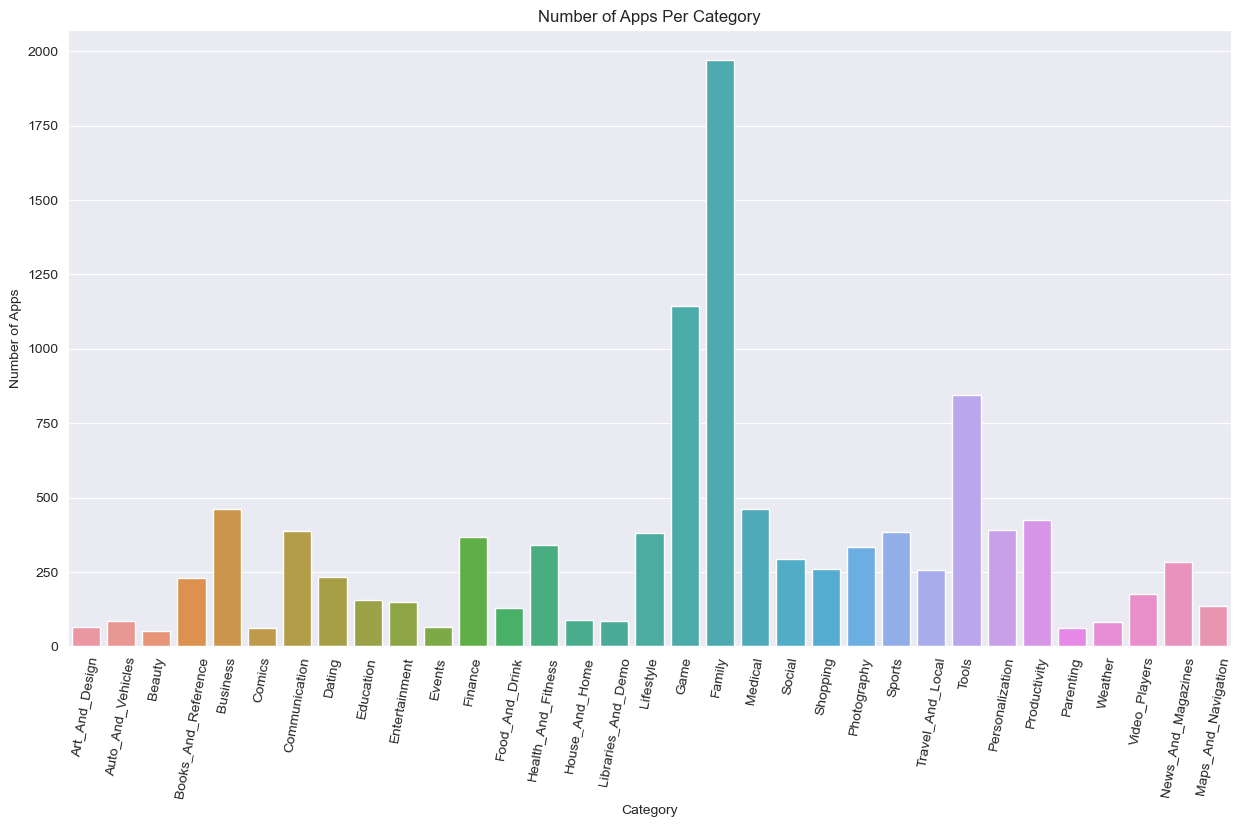

In [49]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.countplot(x='Category', data=df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=80)
plt.ylabel('Number of Apps')
plt.show()

#**Top 10 apps which  has more downloads**#

In [50]:
bm = df.sort_values('Installs',ascending=False)
More_downloads_App= bm.loc[:,['App','Installs']]
More_downloads_App.head(11)

,App,Installs
3896,Subway Surfers,1.000000e+09
3943,Facebook,1.000000e+09
335,Messenger – Text and Video Chat for Free,1.000000e+09
3523,Google Drive,1.000000e+09
3565,Google Drive,1.000000e+09
2884,Google Photos,1.000000e+09
3665,YouTube,1.000000e+09
2853,Google Photos,1.000000e+09
4234,Skype - free IM & video calls,1.000000e+09
3687,Google Play Movies & TV,1.000000e+09


#**Which 10 apps from the 'FAMILY' category are having the lowest rating and highest rating**#

**lowest rating**

In [51]:
ab = df[df['Category'] == 'Family']
bv = ab.sort_values(by=['Rating'], ascending=True)

Family_lowest_rating= bv.loc[:,['Category','Rating']]
Family_lowest_rating.head(11)


,Category,Rating
5978,Family,1.0
10324,Family,1.0
4127,Family,1.0
4905,Family,1.6
6135,Family,1.7
9176,Family,1.7
6812,Family,1.8
4904,Family,1.8
9890,Family,1.9
7416,Family,1.9


**Highest rating**

In [52]:
hi = df[df['Category'] == 'Family']
hig = hi.sort_values(by=['Rating'], ascending=False)

Family_highest_rating = hig.loc[:,['Category','Rating']]
Family_highest_rating.head(11)

,Category,Rating
10837,Family,5.0
9531,Family,5.0
7320,Family,5.0
7307,Family,5.0
7239,Family,5.0
5246,Family,5.0
9496,Family,5.0
9503,Family,5.0
7212,Family,5.0
7204,Family,5.0


#**FREE AND PAID APPS**#

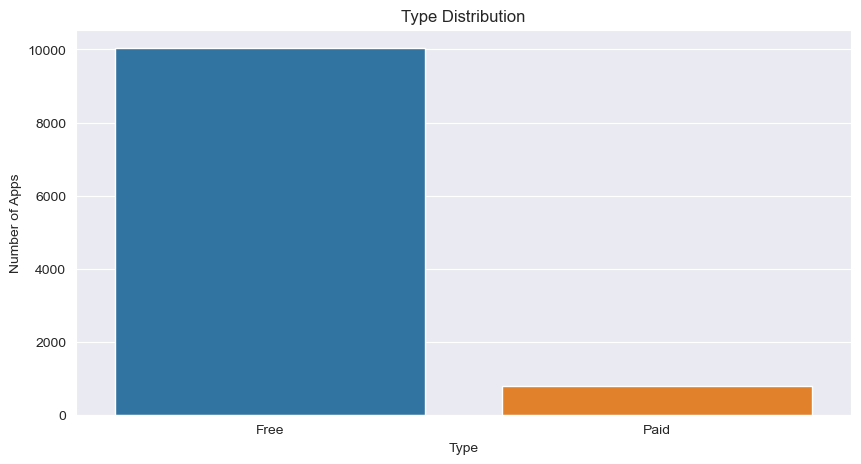

In [55]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Type', data=df)
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.xlabel('Type')
plt.show()

#**Relation between app category and app price**#

Text(0.5, 1.0, 'App pricing trend across categories')

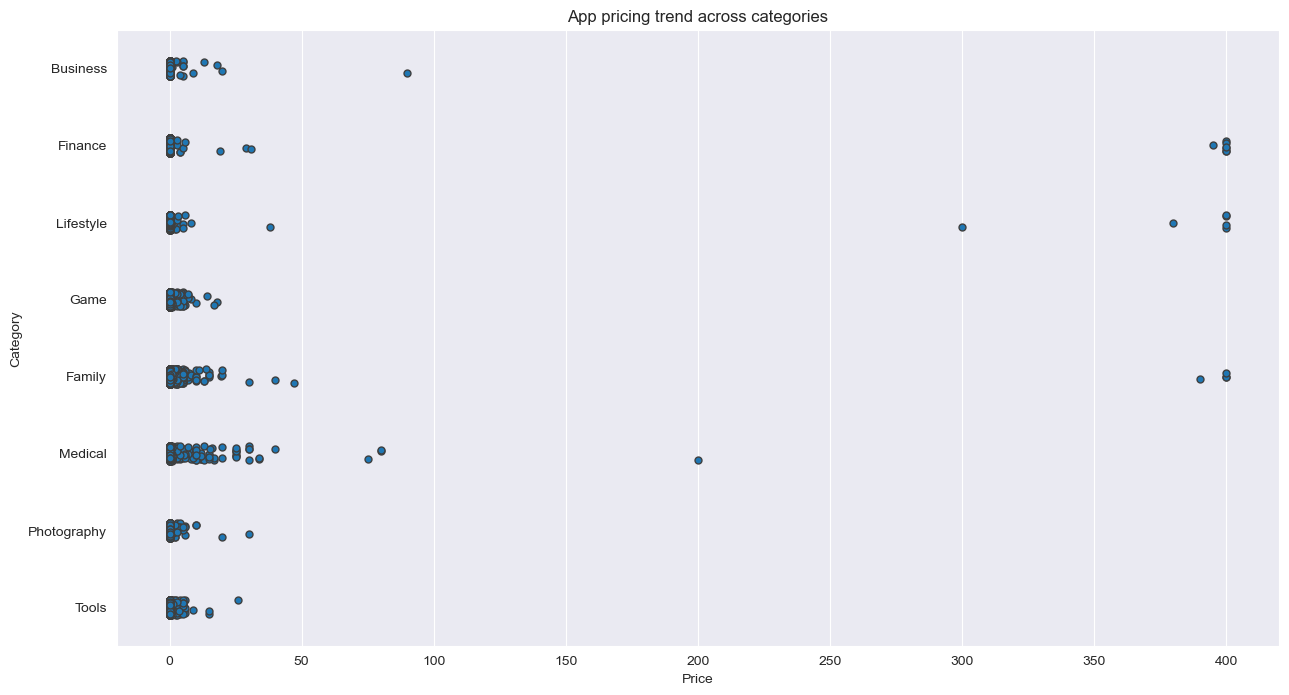

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = df[df.Category.isin(['Game', 'Family', 'Photography',
                                            'Medical', 'Tools', 'Finance',
                                            'Lifestyle','Business'])]

ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

#**Sentiment analysis of user reviews**#

In [57]:
merged_df = pd.merge(df, df2, on = "App")



merged_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

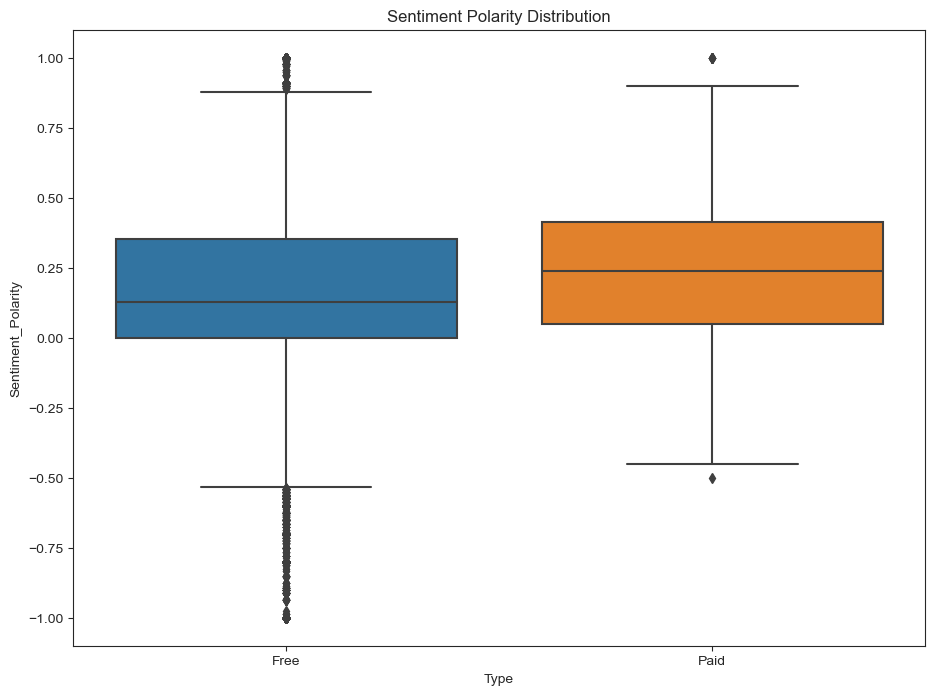

In [58]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)


ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')


#**Filter out "junk" apps**#

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

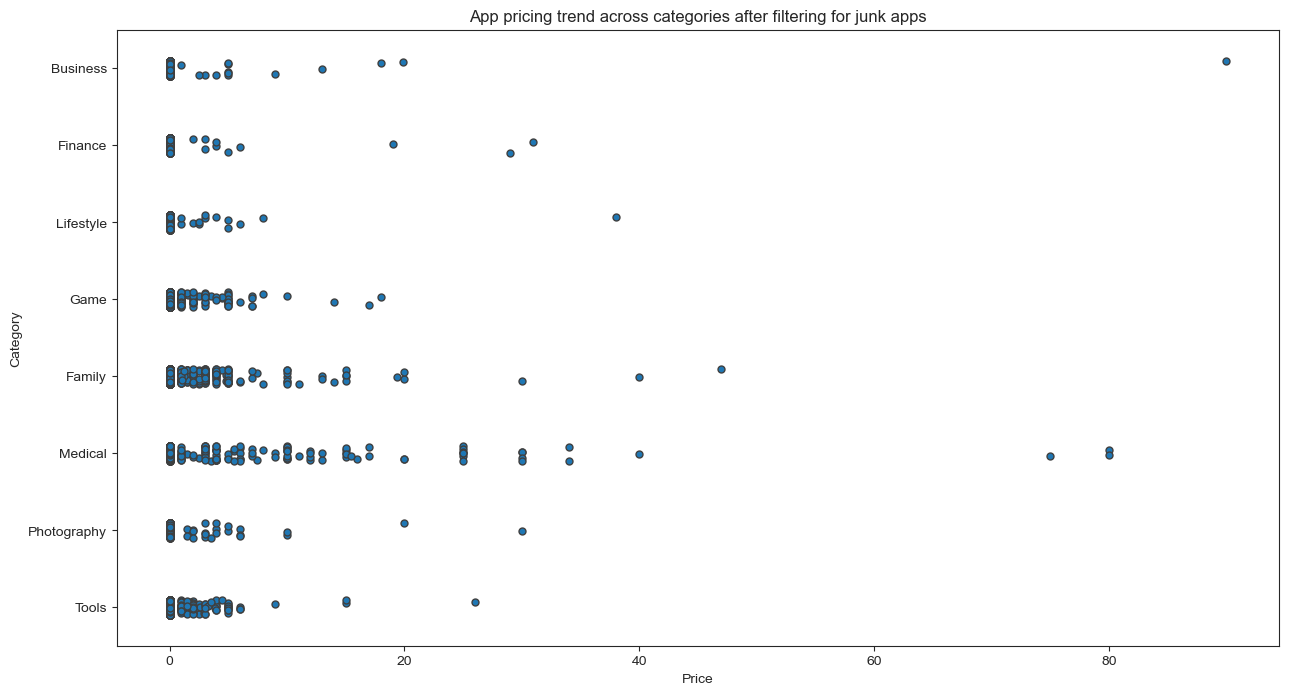

In [59]:
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = "Price", y ="Category", data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')


#**Conclusion**#

we known that -

1) Top 10 Highest rating Apps in google play store in terms of categories

2) Number of Application in terms of Category

3) Top 10 apps which has more downloads

4) Which 10 apps from the 'FAMILY' category are having the lowest rating and highest rating.

5) Free and Paid Apps

6) Relation between app category and app price





## Machine Learning

### Classification to predict whether app is highly rated or not

In [60]:
# Drop rows with missing values in critical columns
df_clean = df[['Rating', 'Size', 'Installs', 'Price', 'Reviews', 'Type', 'Category']].dropna()

# Convert 'Type' to numeric
df_clean['Type'] = df_clean['Type'].map({'Free': 0, 'Paid': 1})

# One-hot encode 'Category'
df_clean = pd.get_dummies(df_clean, columns=['Category'], drop_first=True)

# Create target variable: 1 if Rating >= 4.5
df_clean['High_Rating'] = (df_clean['Rating'] >= 4.5).astype(int)

# Drop original rating
X = df_clean.drop(['Rating', 'High_Rating'], axis=1)
y = df_clean['High_Rating']

# Optional: scale numeric features
scaler = StandardScaler()
X[['Size', 'Installs', 'Price', 'Reviews']] = scaler.fit_transform(X[['Size', 'Installs', 'Price', 'Reviews']])


In [61]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.7464424320827943

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      1057
           1       0.64      0.46      0.54       489

    accuracy                           0.75      1546
   macro avg       0.71      0.67      0.68      1546
weighted avg       0.73      0.75      0.73      1546



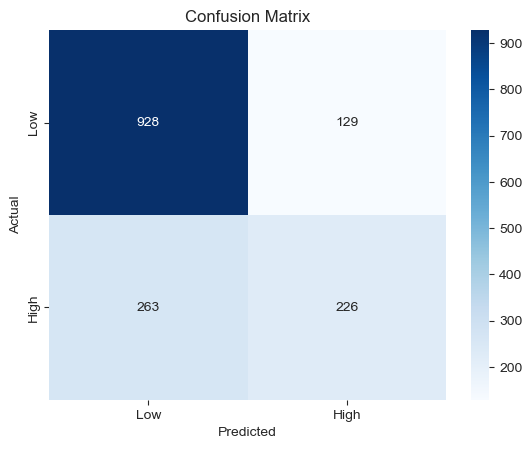

In [63]:
# Evaluating the model

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


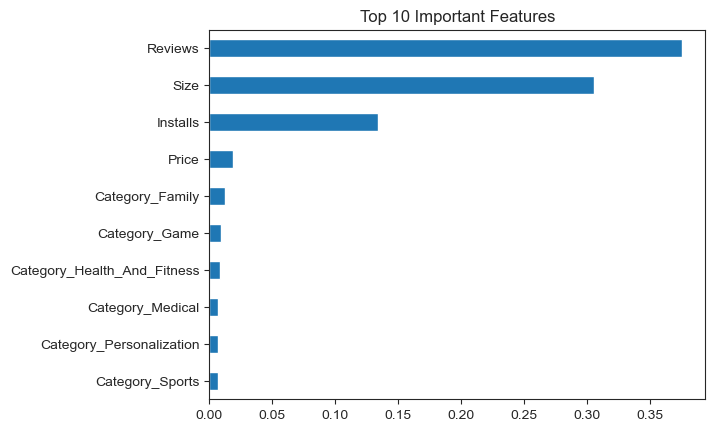

In [64]:
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)
top_features.plot(kind='barh')
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()

### so we get an decent and good amount of accuracy in our random forest classifier model of 0.74
### done with machine learning part and analysis for this project to help developers build the applications on google play store.